In [1]:
import numpy as np # Linear Algebra

import pandas as pd # Handling Data

import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization


# Feature Scaling
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler


# train test split
from sklearn.model_selection import train_test_split,KFold,GridSearchCV

# Feature selection
from sklearn.ensemble import ExtraTreesClassifier

#␣Performance Measures
from sklearn.metrics import classification_report, confusion_matrix

# for modeling

from sklearn.neighbors import KNeighborsClassifier

# to get the accuracy
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('C:\\Users\\DELL\\OneDrive - Excavate Research and Analysis Pvt Ltd\\Pictures\\ML data\\Breast_cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.drop(columns=['id'],inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.drop(columns=['Unnamed: 32'],inplace=True)
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
checkmissvalue=data.isna().sum().sum()
checkmissvalue

0

In [6]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

None

In [7]:
data.shape

(569, 31)

In [8]:
data['diagnosis']=data['diagnosis'].replace({'M':1,'B':0})


EDA

In [9]:
## check whether the data is balanced or imbalanced
true = len(data.loc[data['diagnosis'] == 1])
false = len(data.loc[data['diagnosis'] == 0])
print("\nwe have: {} Person affected\n".format(true))
print("we have: {} person not afected\n".format(false))


we have: 212 Person affected

we have: 357 person not afected



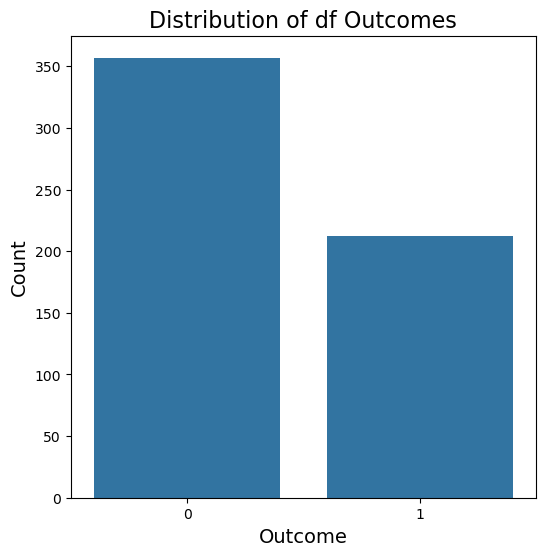

In [10]:
# let's plot this 

plt.figure(figsize=(6,6))
sns.countplot(x='diagnosis',data=data)

plt.title('Distribution of df Outcomes', fontsize=16)
plt.xlabel('Outcome', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

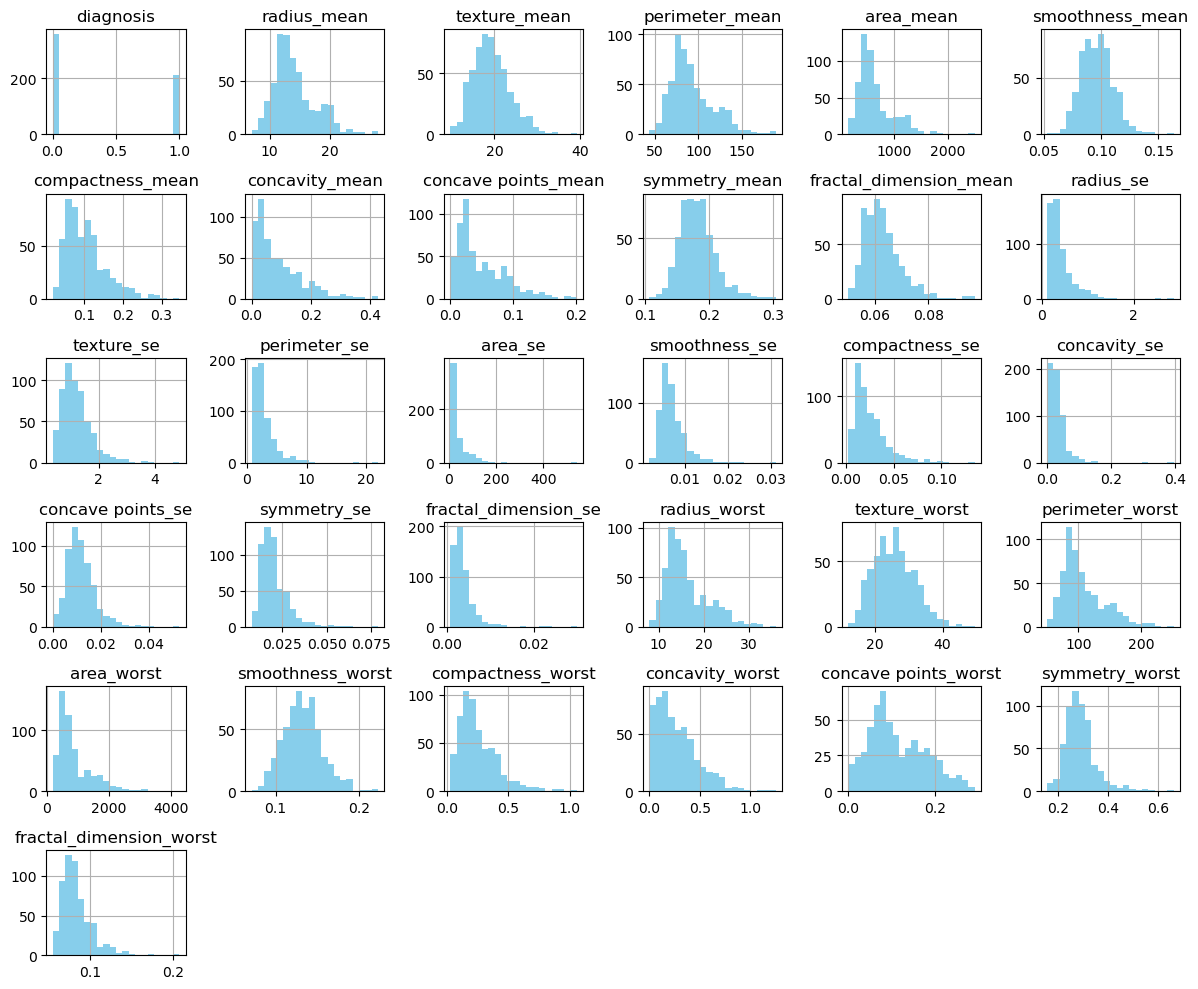

In [11]:
data.hist(figsize=(12, 10), bins=20,color='skyblue')
plt.tight_layout()
plt.show()



___________________________________________________Box plots____________________________________________________



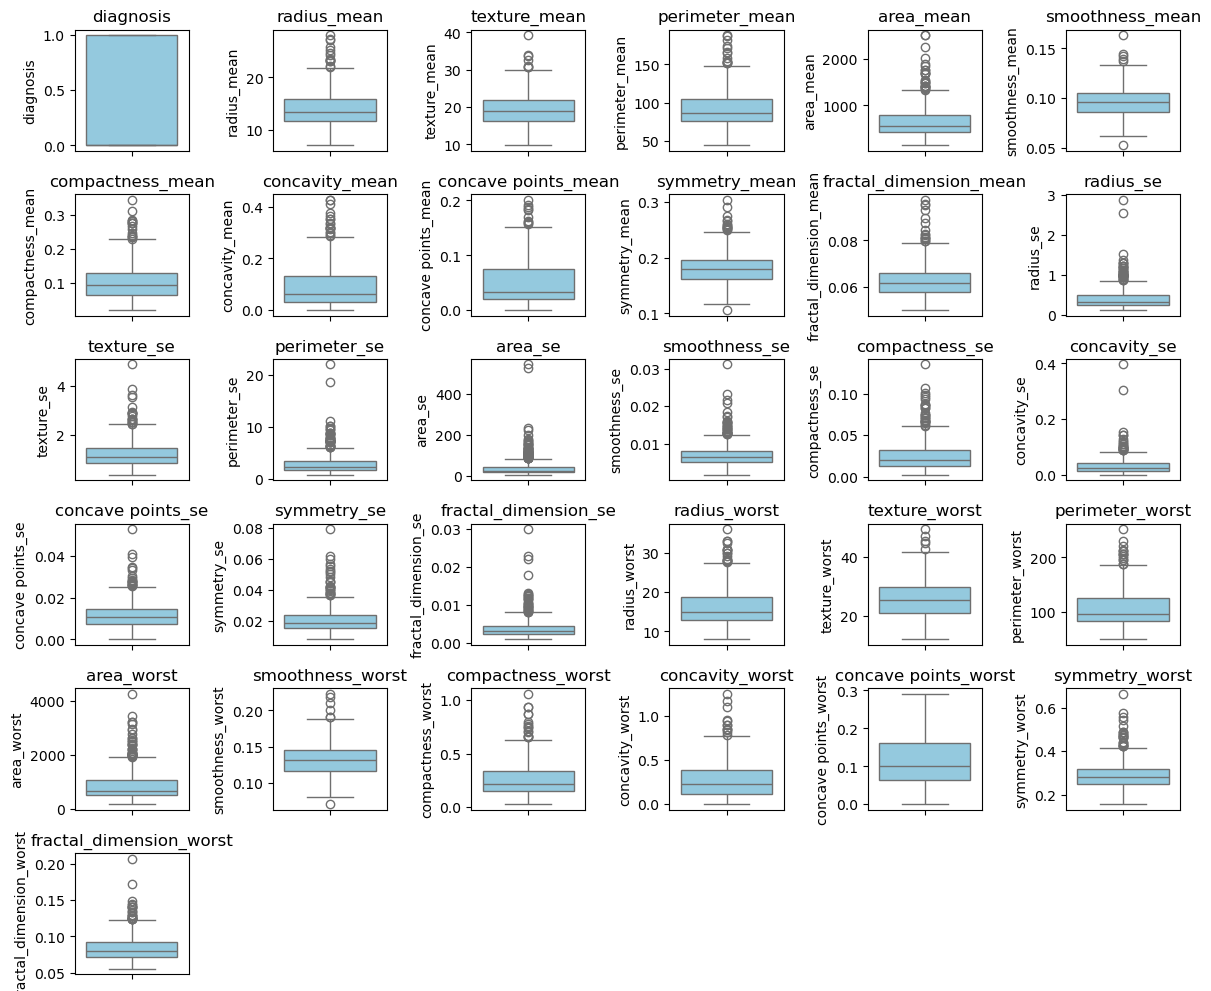

In [12]:
print('\n___________________________________________________Box plots____________________________________________________\n')
plt.figure(figsize=(12, 10))
for i, column in enumerate(data.columns, 1):
    plt.subplot(6, 6, i)
    sns.boxplot(y=data[column],color='skyblue')
    plt.title(column)
plt.tight_layout()
plt.show()


In [13]:
corr = data[data.columns].corr()['diagnosis'].sort_values(ascending = False)
corr = corr.to_frame()
corr.style.background_gradient(cmap="RdYlBu")    ### see dark red coloured column is very very low correlation with Target feature(diagonisis)

,diagnosis
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


In [14]:
correlation_matrix=data.corr()

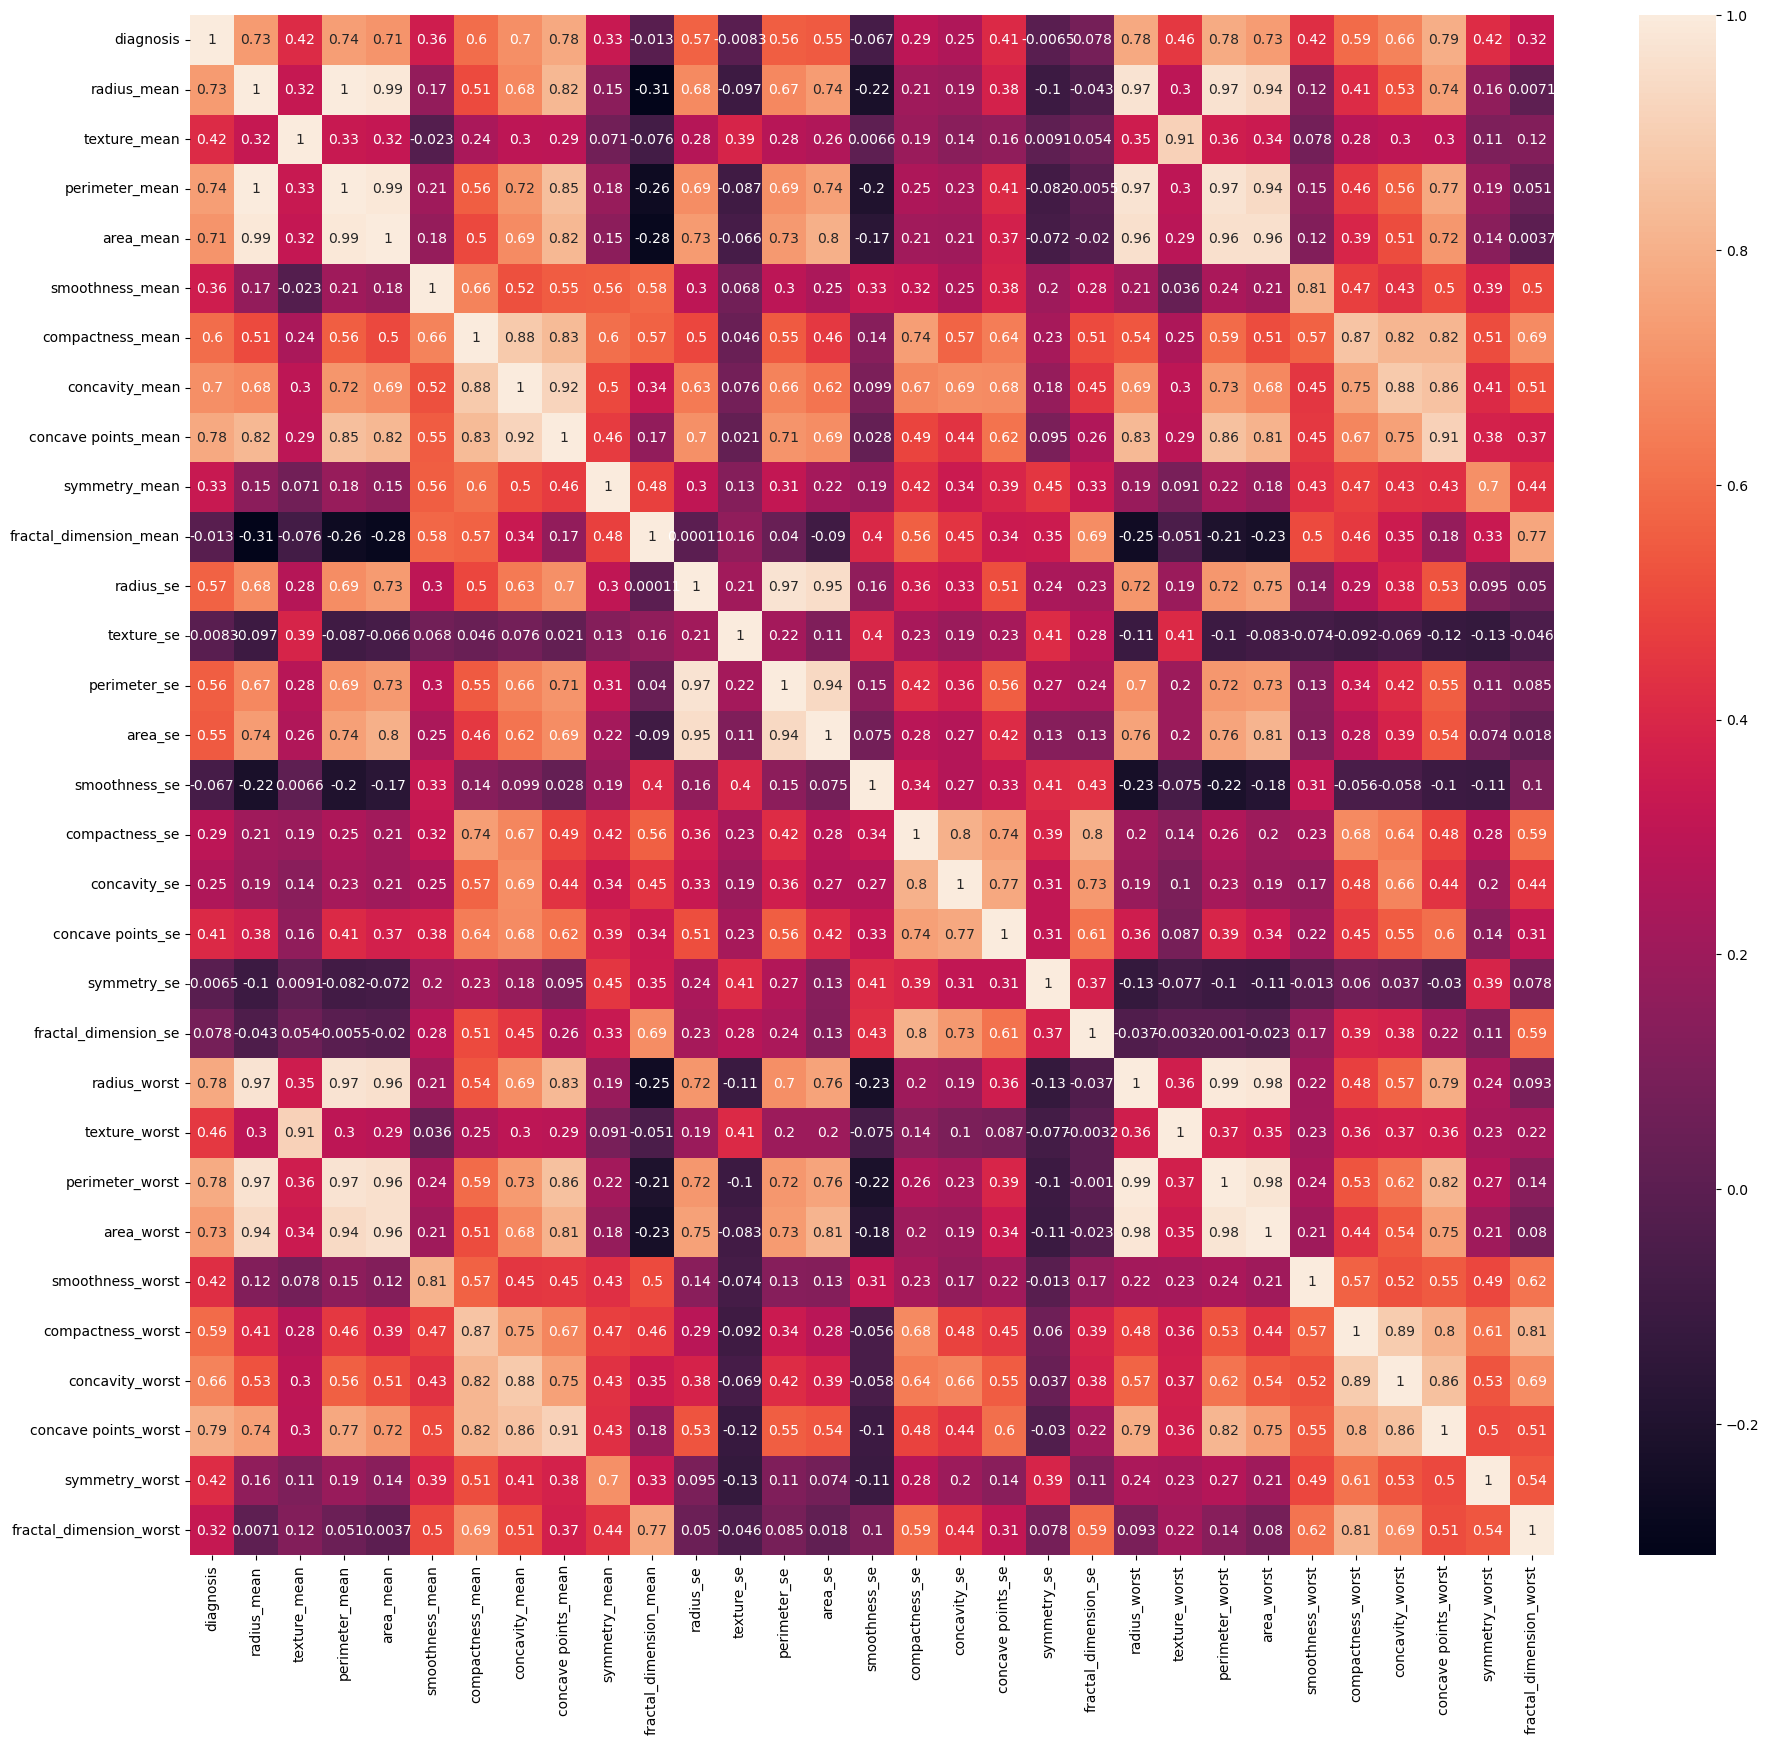

In [15]:
plt.figure(figsize=(22,20))
sns.heatmap(correlation_matrix,annot=True)
plt.show()

In [16]:
def correlation(dataset,threshold): ## threshold =70%
    corr_column=set()     # create  empty set to keep highly correlated feature
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: ## check if correlation of [i,j] >70% 
                column=corr_matrix.columns[i]      ## then we extract that feature 
                corr_column.add(column)     ## after that we add that feature into empty set
    return corr_column
corr_feature=correlation(data,0.8)

In [17]:
corr_feature

{'area_mean',
 'area_se',
 'area_worst',
 'compactness_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_mean',
 'concavity_se',
 'concavity_worst',
 'fractal_dimension_se',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'smoothness_worst',
 'texture_worst'}

In [18]:
## we will delete the very very low correlation feature 
data.drop(columns=['symmetry_se','texture_se','fractal_dimension_mean','smoothness_se'],inplace=True)

In [19]:
X=data.drop(columns='diagnosis')
y=data['diagnosis']

In [20]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.7456,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.4956,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.7572,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
knn=KNeighborsClassifier()

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [23]:
prediction=knn.predict(X_test)
score=accuracy_score(prediction,y_test)
score

0.956140350877193

In [24]:
model = KNeighborsClassifier()

# Define the hyperparameter grid
parameter = {'n_neighbors':[5,7,9,11,13,15],'weights':['uniform','distance'],'metric':['euclidean','manhattan']}

# Define KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform grid search with KFold cross-validation
grid_search = GridSearchCV(model, parameter, cv=kf, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
#print("Best parameters found: ", best_params)

best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(accuracy)
print(conf_matrix)

0.9385964912280702
[[70  1]
 [ 6 37]]
